# DECSKS-18: 1D1V two species Vlasov-Poisson boundary problems part 2

In this notebook we continue DECSKS-18 part 1, where we added perfect asborber boundaries. This notebook adds functionality so that the charge reaching any wall can be accumulated which is used to compute self-consistent potentials on any such wall. We continue the same numbering, hence we begin with objective 3.

# Objective 3: self-consistent calculation of potentials on walls

We move onto including functionality permitting boundary conditions on the potential to be calculated as (see ) on a wall at a location $x = x_w$ as:

$$\partial_x\phi (t, x_w) = -\frac{1}{2}\sigma (t, x_w), \qquad \text{self-consistent (Neumann) boundary condition}$$

where the charge density 

$$``\sigma = q_i \cdot (\text{positive charge density accumulated on wall}) + q_e\cdot ( \text{negative charge density accumulated on wall})"$$

Note, in our units we have normalized by several quantities, including the permittivity. We require adding up the charge from all left-going fluxes (negative velocities) that reach the wall at $x = x_w$. In a fully six-dimensional phase space, we can compute the charge density as (momentarily, we return to SI units in favor of our normalized units since this is less esoteric)

\begin{eqnarray*}
\sigma (t, \vec{x} = x_w\hat{n}) & = & \int_0^t dt' \int_{\hat{\Omega}\cdot \hat{n} < 0} dv \vec{v}\cdot\hat{n} \int d^2v_{\perp} (q_if_i (t', x_w\hat{n}, \vec{v}) - q_ef_e (t', x_w\hat{n}, \vec{v}) )
\end{eqnarray*}

We see consistency with units:

\begin{eqnarray*}
\underbrace{\sigma (t, \vec{x} = x_w\hat{n})}_{\mathrm{[C / m^2]}} & = & \underbrace{\int_0^t dt'}_{\mathrm{[s]}} \underbrace{\int_{-\infty}^0 dv v}_{\mathrm{[m/s]^2}} \underbrace{\int d^2v_{\perp}}_{\mathrm{[m/s]^2}}\underbrace{(f_i (t', x_w\hat{n}, \vec{v}) - f_e (t', x_w\hat{n}, \vec{v})}_{\mathrm{[1 / (m^3 \cdot (m/s)^3]}} \\
\mathrm{\left[\frac{C}{m^2}\right]} & = & \mathrm{[s]}\cdot\mathrm{[m/s]^2}\cdot\mathrm{[m/s]^2}\cdot\mathrm{\left[\frac{1}{m^3 \cdot (m / s)^3}\right]} = \mathrm{[C / m^2]}  \\
\end{eqnarray*}

In our 1D1V model, we evolve the distribution function integrated over all other dimensions:

$$f(t,x, v_x) = \int d^2\vec{x} \int d^2\vec{v} f(t,\vec{x}, \vec{v}) = \mathrm{[m^2]}\cdot\mathrm{[m/s]^2} \mathrm{\left[\frac{1}{m^3\cdot (m/s)^3}\right]} = \mathrm{\left[\frac{1}{m \cdot (m/s)}\right]}$$

Our normalized units are:

$$f(t,x, v_x) = \mathrm{\left[\frac{1}{(multiples \,\,of\, \,\lambda_D) \cdot (multiples\,\, of\,\,v_{Te})}\right]}$$

and our charge "density" is the total charge accumulated at a point that is also normalized (i.e. $\sigma = \mathrm{[charge] / [electron \,\,charge \,\,in \,\,C] = [number \,\,of \,\,charge \,\,carriers]}$). Where the latter interpretation is valid for only singly charged ion species plasmas.

<b>Suppose $x = x_{\ell w}$ marks a "left" wall</b> in our 1D1V framework. The charge density accumulated at this point is given by:

$$\sigma (t, x = x_{\ell w}) = \int_0^t dt' \int_{-\infty}^0 dv_x v_x\left(q_if_i(t', x_{\ell w}, v_x) - q_ef_e(t', x_{\ell w}, v_x)\right)$$

Returning to our normalized units have $q_e = -1$, $q_i = +1$) we would have

$$\sigma (t, x = x_{\ell w}) = -\int_0^t dt' \int_{-\infty}^0 dv_x v_x\left(f_i(t', v, v_x) - f_e(t', x_{\ell w}, v_x)\right), \qquad \text{1D1V charge density at left wall if } \Delta t > 0$$

Note the minus sign in front is needed to compute the correct sign on the charge density $\sigma = \sum_{s = i,e} q_s n_s = n_i - n_e$ (the latter invokes the normalized units we use), since the velocity in this range is negative.
Note that since the sign of the velocity is negative in this range, this expression computes the charge density $\partial_x^2\phi = -(n_i - n_e), \, |q_e| = |q_i| = 1$) with the correct sign as needed. This clearly has units of charge and is the appropriate translation to our lower dimensional case. For a right wall, we would have at a position $x = x_{rw}$:

$$\sigma (t, x = x_{rw}) = \int_0^t dt' \int_{0}^{\infty} dv_x v_x\left(f_i(t', x_{rw}, v_x) - f_e(t', x_{rw}, v_x)\right), \qquad \text{1D1V charge density at right wall if } \Delta t > 0$$

### Note on splitting methods with negative time substeps

Note, the stipulation if $\Delta t > 0$. This proviso acknowledges that while high order splitting schemes (4th order+) can require negative time substeps in their corrective procedure. The Vlasov-Poisson system with boundaries is irreversible, and hence such schemes with negative time substeps are not applicable (and unphysical). The emphasizing circumstance where this becomes inarguable is near physical boundaries in the domain (e.g. charge collection or absorbing). For particles whose velocity is in a direction away from a wall, but which are rewinded back a small fraction of a time step in a high order splitting step in efforts to correct an overshot position (anecdotally we can think of a splitting procedure with positive and negative time steps like this), it is unphysical should such a particle that is being "rewinded" back incidentally hit a wall when stepping backward in tmie, and would be further unphysical to absorb such a particle packet at the wall as dictated by the boundary condition and collect its charge as if it were to have hit the wall during the evolution $t\in [0,t^N]$ of a system. Thus, this limits the split schemes that can be applied to these problems. In particular the following schemes have negative time steps


<u>Schemes with positive and negative time substeps</u>

    Y4
    O6-4
    O11-6
    O14-6
    
These schemes should not be used. Schemes that can be used that come to mind:

<u>Schemes with only positive time substeps</u>

    Lie-Trotter (1st order)
    Strange (LF2, 2rd order)
    
Note as usual we define "order" for splitting schemes to be the global error over a full simulation. 

We regard the following source for schemes that have been developed for irreversible systems:

    High-order time-splitting methods for irreversible equations
    Mariano De Leo
    IMA Journal of Numerical Analysis (2015) doi:10.1093/imanum/drv058

The paper develops new classes of split schemes by modeling the fractional time steps in a split scheme to in general be complex numbers. By enforcing the real part is positive, incidentally the author is able to obtain split schemes to the desired order with exclusively positive time steps.

<b>We thus continue with this analysis with the understanding that we will only use split schemes that have only positive time substeps</b>

Since the lower and upper boundaries must be coded as separate routines anyway, and we agree on using only split schemes with positive time steps, the above specialized charge states can be coded in their already separate routines without a need for logical constructs that would otherwise need to figure out the sign (i.e. at a right wall, only those with $v_j > 0$ can make it to such a location. At a left wall, only those with $v_j < 0$ could have made it)

<b>Hereafter to simplify the notation, whenever we subscript or use the label $w$, we will mean a left wall for the sake of example, if the right wall conditions are different we will address them as they come up</b>

We can reduce the notation here by defining a phase space flux $\gamma$. We define this in lieu of the physical flux $\gamma = nv = \mathrm{[m^{-2} \cdot s^{-1}]}$ in six-dimensional phase space. In 1D1V, a flux has units of $\gamma = nv = \mathrm{[s^{-1}]}$ given our area is reduced to a zero-dimensional point. That is, recall; $f(t,x, v_x) = \int d^2\vec{x} \int d^2\vec{v} f(t,\vec{x}, \vec{v}) = \mathrm{\left[\frac{1}{m\cdot (m/s)}\right]}$, we define $n = \int dv_x f(t, x, v_x) = \mathrm{[m/s]}\cdot \mathrm{\left[\frac{1}{m\cdot (m/s)}\right]} =  \mathrm{[m^{-1}]}$, so that the density is a linear density. Then the flux in 1D1V would be $\gamma = nv = \mathrm{[m^{-1}][m / s]}  = \mathrm{[s^{-1}]}$. The quantity $\gamma = vf = \mathrm{[m/s]}\cdot \mathrm{\left[\frac{1}{m\cdot (m/s)}\right]} = \mathrm{[m^{-1}]}$ is a flux normalized by the velocity $\gamma = vf \sim v \frac{n}{v}$. Hence, we refer to these as normalized fluxes, where the normalization is understood as by velocity. Thus, we can rewrite the above as:

$$\boxed{\sigma (t, x = x_w) = \int_0^t dt' \int_{-\infty}^0 dv_x\left(\gamma^-_{w,i}(t
,v_x) - \gamma_{w,e}(t',v_x)\right) \qquad \text{where } \gamma_{w,(e/i)}(t', v_x) = v_x f_{e/i}(t', x_w, v_x)} \qquad \text{1D1V charge density at left wall in terms of flux}$$

Where the subscript $w$ refers to fluxes that have hit the wall. We can write a discrete statement in acknowledgement of the above insights (i.e. either the entire density $f$ is collected at the wall or a fraction $Uf$) 

the above is a continuum computation which of course operates on a continuum "grid". That is, it communicates the understanding that we have knowledge of all such density packets $f$ that exactly reach the wall or beyond; any packets that are at any distance, no matter how small ($\varepsilon >0$), that does not reach the wall exactly is not counted. Thus, we can say this calculation relies on continuum information.

On a discrete grid, We allocate the density packet to two contiguous cells; it is possible that only a fraction of density packet is mapped to the wall, whereas the remainder is at the appropriated to the grid point immediately in front of it. Thus, some care is needed for edge cases (though not much), and we cannot execute the above as written in a discrete framework. Ultimately, this amounts to replacing the above fluxes $\Gamma \sim f_{i,j}$ with either $f_{i,j} \pm [Uf]_{i,j}$ if we are examining postpoints $k_1$ (nearest grid points to true (non-integer) postpoint location), or $\pm [Uf]_{i,j}$ if we are examining $k_2$ (contiguous grid point that closes the interval where the true postpoint lies within).

The charge collection/absorption boundary condition is only relevant for advection steps in space (cannot be interpreted as a boundary condition for velocity advection), and only relevant for positive time steps. We designate, as usual, prepoints for a packet as $(i,j)$, which in a time substep $\Delta t$ is advected to an exact postpoint $(i', j')$ (during an advection step in configuration $i$, $j' = j$ in most cases. In a symmetric boundary condition, $j' \neq j$ in general). The postpoint $i'$ will not lie exactly on a grid point, but between two grid points $k_1$ and $k_2$ ($|k_2| > |k_1|$, i.e. $i'\in [k_1,k_2]$ if $v_j > 0$, or $i'\in [k_2,k_1]$ if $v_j < 0$). Thus, the density packet is appropriated to contiguous grid points according to some fraction $U_{i,j}$ (a proportion ($1\pm U_{i,j}$) is allocated to $k_1$ and the remainder $\pm U_{i,j}$ is deposited at $k_2$, the sign is chosen so that the two aforementioned quantities are positive fraction, i.e. $U_{i,j}$ can be either sign. This is done done so in proportions calculated to be optimized up to a chosen order of LTE accuracy (To zeroeth order, this fraction is the CFL fraction, the distance between $k_1$ and the true postpoint $i'$).

For a left-wall, any such packet must be travelling leftward, if we denote the postpoint value $k_{\ell}\in\mathbb{Z}$ where $\ell = \{1,2\}$ denotes the nearest and contiguous grid points

####<u>Rules for proportions of the density that are allocated to the walls</u>

<table "width = 95%">
<tr><td>
<b>Leftward advection ($U_{i,j} < 0$) towards a wall at $i = 0$</b>
</td></tr>
<tr><td>
<ol>
<li> <font color = "blue">$k_{\ell} > 0$</font>: the packet does not reach the wall; note an upper bound on $k_{\ell}$ is not relevant since the direction of advection is leftward.
<li> <font color = "blue">$k_{\ell} \leq 0$</font>: collect fractions of the total density according to:
<ul>
<li>if $k_{\ell} = k_1$: the proportion $f_{i,j} + [Uf]_{i,j}$ is collected at the wall
<li>if $k_{\ell} = k_2$: the proportion $-[Uf]_{i,j}$ is collected at the wall.
</ul>
$${}$$
</ol>
</td></tr>
</table>

<table "width = 95%">
<tr><td>
<b>Rightward advection ($U_{i,j} \geq 0$) towards a wall at $i = N_x-1$</b>
</td></tr>
<tr><td>
<ol>
<li> <font color = "blue">$k_{\ell} < N_x-1$</font>: the packet does not reach the wall; note a lower bound on $k_{\ell}$ is not relevant since the direction of advection is rightward.
<li> <font color = "blue">$k_{\ell} \geq N_x-1$</font>: collect fractions of the total density according to:
<ul>
<li>if $k_{\ell} = k_1$: the proportion $f_{i,j} - [Uf]_{i,j}$ is collected at the wall
<li>if $k_{\ell} = k_2$: the proportion $[Uf]_{i,j}$ is collected at the wall.
</ul>
$${}$$
</ol>
</td></tr>
</table>

After these charges are factored into a charge density, the entries can be sent to the <code>boundaryconditions.absorbing</code> methods, which zero out the entries so that in the subsequent remap step they remap zero contribution to the on-grid densities, which is consistent since we should discard the particles reaching the wall after we factor in their physics (charge collection is their only role at that point). The absorbing boundary condition did not require us to treat each proportion according to the special remap proportions as above, as if a postpoint is at the wall or beyond we just zero it out, and are done. Here, for the charge collecting condition, we just need to make sure we count only as much charge as makes it to the wall, and no more. Afterwards, we remove them from the system (have them absorbed).

In moving towards a discrete update for the charge density. It is useful for generality to introduce a fraction $\chi_{\ell}$ that discretizes the flux $\gamma_{i,j}$ according to the above rules, i.e. we work with a discrete flux $\Gamma_{i,j,\ell} = \chi_{j, \ell}\gamma_{i,j}$ where the $w$ denotes it pertains to all such density packets that reach a wall. Recalling $\gamma_{i,j} = v_{x,j}f_{i,j}$, we define:

$$\chi_{j,\ell = 1} = \begin{cases}
(1 + U_{i,j}) & \text{if } v_{x,j} \geq 0 \text{ and } k_{\ell} = k_1 \\
& \\
(1 - U_{i,j}) & \text{if } \text{if } v_{x,j} \leq 0 \text{ and } k_{\ell} = k_1\\
\end{cases}
$$

and

$$\chi_{j,\ell = 2} = \begin{cases}
U_{i,j} & \text{if } v_{x,j} \geq 0 \text{ and } k_{\ell} = k_2 \\
& \\
-U_{i,j} & \text{if } \text{if } v_{x,j} \leq 0 \text{ and } k_{\ell} = k_2\\
\end{cases}
$$

Thus, for example, if a density packet at $(i,j)$ reaches the a postpoint (which could be inside the domain or even past a wall) $k_1$ with $v_{x,j} < 0$, we would appropriate 


$$\Gamma_{i,j,\ell = 1} = \chi_{j,\ell = 1}\gamma_{i,j} = (1 + U_{i,j})[v_{x,j} f_{i,j}] = v_{x,j}(f_{i,j} + [Uf]_{i,j})$$

Which is the exact proportion as indicated by the remapping rule as usual, where a true flux is generated by multiplying by the physical velocity $v_{x,j}$. Hence, a discrete version of the above update can be succinctly written down as:

<table "width = 95%">
<tr><td><b>Discrete charge density update</b></td></tr>
<tr><td>
$${}$$
The charge distribution at any time $t = t^m$ at a <u>left wall</u> at a position $x = x_{Lw}$ is given by:
$${}$$
$$\sigma (t^m, x_{Lw}) = -\sum_{\ell = 1,2}\,\,\sum_{i\colon i + k_{\ell}\leq 0}\,\,\sum_{j\colon v_j < 0 } \Delta v \, (\Gamma^{ion}_{i,j,\ell}(t^m) - \Gamma^{elec}_{i,j,\ell}(t^m))$$
$${}$$
the wall potential depends on the cumulative charge density collected, 
$${}$$
$$\sigma (t^n, x_{Lw}) = \sum_{m = 0}^n \Delta t \, \sigma (t^m, x_{Lw}), \qquad \text{where } t^n \geq t^k$$
$${}$$
where $\Gamma^{s}_{i,j,\ell} = \chi_{j,\ell}\gamma_{i,j}^s = \chi_{i,j,\ell}v_j f_{i,j}^s$ for a species $s = \{elec,ion\}$ are the generalized fluxes as defined above which originate at a spatial prepoint $x_i$ equipped with velocity $v_j$ 
$${}$$
Similarly,the charge distribution at any time $t = t^m$ at a <u>right wall</u> at a position $x = x_{Rw}$ is given by:
$${}$$
$$\sigma (t^m, x_{Rw}) = \sum_{\ell = 1,2}\,\, \sum_{i\colon i + k_{\ell} \geq N_x-1}\,\,\sum_{j\colon v_j \geq 0 } \Delta v \, (\Gamma^{ion}_{i,j,\ell}(t^m) - \Gamma^{elec}_{i,j,\ell}(t^m))$$
$${}$$
the wall potential depends on the cumulative charge density collected, 
$${}$$
$$\sigma (t^n, x_{Rw}) = \sum_{m = 0}^n \Delta t \, \sigma (t^m, x_{Rw}), \qquad \text{where } t^n \geq t^k$$
$${}$$

where the only change is the sign in front of the current charge density calculation at time $t = t^m$. This accounts for the sign of the velocity for left vs. right walls.
</td></tr>
</table>

Note, we do not actually compute the fraction $U_{i,j}$ alone, but the grouped quantity $[Uf]_{i,j}$. Thus, the abvoe frames the procedure nicely, and generally, but the specific implemenation we do is more unfolded as we evade storage in extraneous objects ($\chi_{j,\ell}$, $\Gamma_{i,j,\ell}$, etc.) and deal with the constituent arrays ($f_{i,j}$, $[Uf]_{i,j}$, etc.) to perform the equivalent computations. In an implementation, this comes at the cost of conditional checks to see which postpoint we are working with $k_1$ or $k_2$, and possibly others.

Combining the details listed in "Rules for proportions of the density that are allocated to the walls" above and the charge density update, we have the following implementation

<table>
<tr><td>
<b>Charged wall implementation for species $s$: left wall$^{\dagger}$</b>
</td></tr>
<tr><td>
<ol> Loop over $k_{\ell}$, $\ell = 1,2$:
$${}$$
<li>Copy all fluxes in $\underline{\underline{[Uf]_{s}}}(t^{n-1}, x_i, v_j)$ for all $(i,j)\colon i \mapsto i'= i + \bigl\lfloor\frac{v_j\Delta t}{\Delta x}\bigr\rfloor \leq 0$ and relocate them to new identically-dimensioned object $[Uf]_{s, absorbed}$ where all other entries are zero. That is, 
$${}$$
$$([Uf]_{s, absorbed})_{ij} = \begin{cases}([Uf]_{s})_{ij} & \text{if } i + k_{\ell} \leq 0\\
0 & \text{else} \end{cases}$$
$${}$$
<li>If $k_{\ell} = k_1$ (unneeded for $k_2$ proportion), copy all particles in $\underline{\underline{f_{s}}}(t^{n-1}, x_i, v_j)$ for all $(i,j)\colon i \mapsto i' = i + \bigl\lfloor\frac{v_j\Delta t}{\Delta x}\bigr\rfloor \leq 0$ and relocate them to new identically-dimensioned object $f_{e/i, absorbed}$ where all other entries are zero. That is, 
$${}$$
$$(f_{s, absorbed})_{ij} = \begin{cases}(f_{s})_{ij} & \text{if } i + k_{1} \leq 0 \\
0 & \text{else} \end{cases}$$
$${}$$
<li> Zero out the entries at the above $(i,j)$ in $\underline{\underline{f}}_{s}(t^{n-1})$ and $\underline{\underline{[Uf]}}_{s}(t^{n-1})$ (this effectively "moves" all absorbed prepoint density packets to a separate array). This zeroing out is done by passing the objects to absorbing boundary condition method.
<li> The partial contribution $\sigma^s_{n\ell}$ to the charge density from species $s$ at the current time step $\sigma^s_n (t^n, x_w)$ from all such prepoint density packets that map to $k_{\ell} \, (\ell = 1,2)$ is the discrete integral over velocity space:
$${}$$
if $k_{\ell} = k_1$:
$${}$$
$$\sigma^s_{n\ell}(t^n, x_w) = -q_s\sum_{i = 0}^{N_x}\sum_{j = 0}^{\lfloor \frac{N_v}{2}\rfloor} \Delta v \cdot v_{x,ij} \cdot (f_{s, absorbed})_{ij} + ([Uf]_{s, absorbed})_{ij}$$
$${}$$
if $k_{\ell} = k_2$:
$$\sigma^s_{n\ell}(t^n, x_w) = -q_s\sum_{i = 0}^{N_x}\sum_{j = 0}^{\lfloor \frac{N_v}{2}\rfloor} \Delta v \cdot v_{x,ij} \cdot (-[Uf]_{s, absorbed})_{ij}$$
$${}$$
where $q_s$ is the species charge. The minus sign ensures the proper sign is factored into the charge density given that the velocity for any such density packet that can reach a left wall must be negative, and we only require summing over negative velocities, $v_j < 0$, i.e. $0 \leq j \leq \lfloor N_v / 2\rfloor$. Note, the total density at the current time step $t^n$:$ \sigma_n = \sum_s \sum_{\ell} \sigma^s_{n\ell}$ is never computed for lack of reason given what matters is the cumulative charge density (below). This procedure is run through $k_1$, then $k_2$ and the sums thus are already formed, and the below increment sums over all species to properly form the cumulative density $\sigma$.
<li>Increment the cumulative charge density (global variable) to keep track of charge history:
$${}$$
$$\sigma (t\in [0,t^n], x_w)\, +\hspace{-.3em}= \sigma^s_{n\ell} (t^n, x_w)$$
$${}$$
$${}$$
</tr></td>
<tr><td>
$\dagger$: For a right wall, the changes are minimal. 
<ul>
<li> In steps 1 and 2, the qualifying condition is $(i,j)\colon i \mapsto i'= i + \bigl\lfloor\frac{v_j\Delta t}{\Delta x}\bigr\rfloor \geq N_x - 1$ for exiting density packets 
<li> In step 4, we take $([Uf]_{s,absorbed})_{ij} \rightarrow -([Uf]_{s,absorbed})_{ij}$ given then sign is oppositely directed as compared to the left wall.
<li> In step 4, the prepended minus sign is removed (the velocity is positive so there the sign on the charge is appropriately factored in)
<li> In step 4, sum in velocity over $\lfloor N_v / 2 \rfloor + 1 \leq j \leq N_v - 1$, which correspond to nonnegative velocities $v_j \geq 0$.
</ul>
</td></tr></table>

Note, the reader should combine the if checks above for which postpoint we are on $k_1$ or $k_2$. Also, the notice about how only half the velocities need to be summed over can be exploited if we code our own routine in C/Cython (we do this in a later notebook). Otherwise, if we are using numpy routines, then we do not have access under the hood here, and do not absorb significantly more cost anyway, so it is not a hangup or worth thinking about more. That is, instead of summing over half the range if using numpy routines, we just use <code>numpy.sum</code> to sum over all entries, where half the entries are zero anyway.

#### Pseudocode for charge collection boundary conditions
 
    #### LEFT WALL
    
    # both k = 0, k = 1 need this fraction
    Uf_absorbed =  Uf_old[i,j] entries with z.postpoints[k,i,j] <= 0 
   
    # only k = 0 needs the following
    if k == 0:
    
        f_absorbed = f_old[i,j] entries with z.postpoints[k,i,j] <= 0
        sigma_nk = -charge * np.sum ( vx.prepointvaluemesh * (f_absorbed + Uf_absorbed) ) * vx.width 
    
    else
    
        sigma_nk = -charge * np.sum ( vx.prepointvaluemesh * (-Uf_absorbed) ) * vx.width
    
    sigma += sigma_nk
    
    # remove the exiting particles from f, Uf to prep for subsequent remapping (will remap with zero contribution)
    f_old = absorbing_lower_boundary(f_old, ...)
    Uf_old = absorbing_lower_boundary(Uf_old, ...)
    
    return f_old, Uf_old
    
     
    #### RIGHT WALL
    
    # both k = 0, k = 1 need this fraction
    Uf_absorbed =  Uf_old[i,j] entries with z.postpoints[k,i,j] >= z.N - 1
   
    # only k = 0 needs the following
    if k == 0:
    
        f_absorbed = f_old[i,j] entries with z.postpoints[k,i,j] >= z.N - 1
        sigma_nk = -charge * np.sum ( vx.prepointvaluemesh * (f_absorbed + Uf_absorbed) ) * vx.width 
    
    else
    
        sigma_nk = -charge * np.sum ( vx.prepointvaluemesh * (-Uf_absorbed) ) * vx.width
    
    sigma += sigma_nk
    
    # remove the exiting particles from f, Uf to prep for subsequent remapping (will remap with zero contribution)
    f_old = absorbing_lower_boundary(f_old, ...)
    Uf_old = absorbing_lower_boundary(Uf_old, ...)
    
    return f_old, Uf_old

The above cumulative charge density object can be stored in one 2D object, and we may sum up along the zero axis at each time step for all time steps previous, but this is also unneeded expense. Instead, we note that all that is needed here is the current charge density total. To that end, a charge density <code>sigma_n</code> at time <code>t.stepnumbers[n]</code> where <code>sigma_n.shape = (x.N,)</code> the total can be stored in <code>sigma += sigma_n</code> or <code>sigma -= sigma_n</code> depending on if we are adding contributions from <code>fi</code> or <code>fe</code>, respectivel where <code>sigma_n</code> is locally computed at each step, and <code>sigma</code> is an array avaiable at a higher scope (e.g. we can choose to store this as <code>sim_params['sigma']</code> in the dictionary <code>sim_params</code> by including additional setup in <code>lib.read</code> that is sensitive to the values of <code>sim_params['BC']['x']['left']</code> and <code>sim_params['BC']['x']['right']</code>. Should these boundary conditions be specified <code>etc/params.dat</code> as <code>self-consistent</code> then a global array <code>sim_params['sigma']['left']</code> or <code>sim_params['sigma']['right']</code> is initialized to an empty array of size <code>(x.N,)</code>, otherwise <code>None</code>. Thus, we require checking any such boundary (lower or upper) that has its <code>sim_params['BC']['x']</code> indicated as <code>self-consistent</code>. For example, a naive implementation (pseudo-code) at the lower boundary would be:

We end up using the following implementation, where an argument (int) charge = 1 or -1 is passed through from the initial method call and directly assigns the correct sign of contribution to the total charge density based on whether we are evolving fe or fi without needing any conditional checks. That is, in <code>lib.split.scheme</code> we have calls like:

                fe[n,:,:] = DECSKS.lib.convect.scheme(
                        fe[n,:,:],
                        n,
                        sim_params,
                        z = x,
                        vz = vx,
                        charge = -1)
                fi[n,:,:] = DECSKS.lib.convect.scheme(
                        fi[n,:,:],
                        n,
                        sim_params,
                        z = x,
                        vz = vx,
                        charge = 1)


In [ ]:
def charge_collection_lower_boundary(f_old, Uf, zpostpointmesh, k, z, vz, sim_params, charge):

    # this discriminates vx vs. x, as the boundary condition function handle
    # sim_params['BC'][z.str]['lower' or 'upper'] for z.str = 'vx' is never set to 'charge_collection'
    # in lib.read

    # collect density packets that reach the boundary (or beyond)

    Uf_absorbed = np.where(z.postpointmesh <= 0, Uf, 0)
    if k == 0: # if nearest grid point
        f_absorbed = np.where(z.postpointmesh <= 0, f_old, 0)
        
        # the fraction (1 + U[i,j]) of f_absorbed[i,j] is deposited at the wall (written below as (f + Uf))
        # any vz.prepointvaluemesh[i,j] which pushed a particle to this edge is negative
        # any Uf_absorbed which corresponds to the normalized flux of particles at the edge is also negative
        # the minus sign in front of vz.prepointvaluemesh acts as the absolute value operator
        sigma_nk = charge * np.sum(-vz.prepointvaluemesh * (f_absorbed + Uf_absorbed) * vz.width)

    elif k == 1:

        # the fraction (-U[i,j]) of f_absorbed[i,j] is deposited at the wall (written below as (-Uf))
        
        # minus signs have been cancelled here, the raw version of this might be thought of as
        # sigma_nk = charge * np.sum((-vz.prepointvaluemesh) * (-Uf_absorbed) * vz.width)
        # where Uf_absorbed < 0 as well.

        sigma_nk = charge * np.sum(vz.prepointvaluemesh * (Uf_absorbed) * vz.width)

    # update global variable, sigma
    sim_params['sigma'][z.str]['lower'] += sigma_nk

    # remove the exiting particles from f, Uf to prep for subsequent remapping (will remap with zero contribution)
    f_old, Uf = absorbing_lower_boundary(f_old, Uf, zpostpointmesh, k, z, vz, sim_params, charge)

    return f_old, Uf

def charge_collection_upper_boundary(f_old, Uf, zpostpointmesh, k, z, vz, sim_params, charge):

    # this discriminates vx vs. x, as the boundary condition function handle
    # sim_params['BC'][z.str]['lower' or 'upper'] for z.str = 'vx' is never set to 'charge_collection'
    # in lib.read

    # collect density packets that reach the boundary (or beyond)

    Uf_absorbed = np.where(z.postpointmesh >= z.N-1, Uf, 0)
    if k == 0: # if nearest grid point
        f_absorbed = np.where(z.postpointmesh >= z.N-1, f_old, 0)
        
        # the fraction (1 - U[i,j]) of f_absorbed[i,j] is deposited at the wall (written below as (f - Uf))
        # any vz.prepointvaluemesh[i,j] which pushed a particle to this edge is positive
        # any Uf_absorbed which corresponds to the normalized flux of particles at the edge is also positive
        sigma_nk = charge * np.sum(vz.prepointvaluemesh * (f_absorbed - Uf_absorbed) * vz.width)

    elif k == 1:

        # the fraction (U[i,j]) of f_absorbed[i,j] is deposited at the wall (written below as (Uf))

        sigma_nk = charge * np.sum(vz.prepointvaluemesh * (Uf_absorbed) * vz.width)

    # update global variable, sigma
    sim_params['sigma'][z.str]['lower'] += sigma_nk

    # remove the exiting particles from f, Uf to prep for subsequent remapping (will remap with zero contribution)
    f_old, Uf = absorbing_lower_boundary(f_old, Uf, zpostpointmesh, k, z, vz, sim_params, charge)

    return f_old, Uf


Note that above we have collected the charge at such walls in objects <code>sigma</code>, and afterwards we absorb those particles, zeroing them out from the system as they have been collected and are not in the domain thenceforth.

Additionally, in <code>lib.read</code> we exploit the key/value pairs already assigned in the boundary conditions :(BC) dictionary, <code>sim_params['BC'][z.str]['type'] = 'peroidic' or 'nonperiodic'</code> and in the event that we wish to have self-consistent calculations on phi, the charge collection routine is triggered on such a boundary by reading in conditionally if phi boundary has "self-consistent" specified by the user in <code>etc/params.dat</code> then <code>sim_params['BC'][z.str]['lower' or 'upper']</code> is set to <code>'charge_collection</code>...

in <code>lib.read</code>

    sigma = {}
    sigma['x'] = {}
    if BC['x']['phi']['lower'] == 'self-consistent':
        sigma['x']['lower'] = 0    # initialize to zero charge at time zero
        BC['x']['lower'] = 'charge_collection'
    if BC['x']['phi']['upper'] == 'self-consistent':
        sigma['x']['upper'] = 0    # initialize to zero charge at time zero
        BC['x']['upper'] = 'charge_collection'


and the relevant boundary condition function handle is assembled in <code>lib.boundaryconditions.nonperiodic</code>

    # lower boundary
    f_old, Uf = eval(sim_params['BC'][z.str]['lower'] +
                           '_lower_boundary')(f_old, Uf,
                                              z.postpointmesh[k,:,:], z, vz,
                                              sim_params, charge)

    # upper boundary
    f_old, Uf = eval(sim_params['BC'][z.str]['upper'] +
                           '_upper_boundary')(f_old, Uf,
                                              z.postpointmesh[k,:,:], z, vz,
                                              sim_params, charge)
    

meanwhile, the orchestrator <code>lib.boundaryconditions.periodic</code> vs. <code>lib.boundaryconditions.nonperiodic</code> is called from dictionary access, which was constructed 

in <code>lib.read</code>

    boundarycondition_function_handle_prefix = 'DECSKS.lib.boundaryconditions'

    # create a dictionary for every phase space variable simulated
    boundarycondition_function_handle = {}

    for var in phasespace_vars:
        boundarycondition_function_handle[var] = ".".join(
            (boundarycondition_function_handle_prefix, BC[var]['type']))
            
       

Finally, to self-consistently compute the potential we require a <b>Neumann</b> condition on our Poisson solver since at the charge collection plate we have a condition on $\partial_x\phi (x_w)$, not on $\phi$ alone.

We develop this in DECSKS-04.

In [ ]:
# unchanged

def compute_electric_field_fd_dirichlet(fe, fi, x, vx, n, sim_params):

    phi = Poisson_DBC_1D1V_2S(fe, fi, x, vx, n, sim_params)

    # currently the finite difference weight matrix W_dn1 is a 6th order LTE to
    # match the 6th order LTE on the Poisson solve
    dphi = 1 / x.width ** 1 * sim_params['W_dn1_LTE6'].dot(phi)
    Ex = -dphi

    return Ex


# lines pertaining to sigma added below

def Poisson_DBC_1D1V_2S(fe, fi,
                x, vx, n,
                sim_params):
    """6th order LTE finite difference Poisson solver for Dirichlet BCs

    see notebook DECSKS-04 for details on construction

    https://github.com/dsirajud/IPython-notebooks/blob/master/
    DECSKS-04%20--%20Design%20of%20a%206th%20order%20FD%20Poisson%20solver/
    DECSKS-04%20--%20Design%20of%20a%206th%20order%20FD%20Poisson%20solver.ipynb

    The signature 2S = "two species"

    inputs:
    fe -- (ndarray, dim=2) electron density fe(x,v,n) at time step t^n
                          used to compute ne(x,n) at time step t^n
    fi -- (ndarray, dim=2) ion density fe(x,v,n) at time step t^n
                          used to compute ni(x,n) at time step t^n
    x -- (instance) spatial variable
    v -- (instance) velocity variable
    n -- (int) time step number, t^n


    outputs:
    phi -- (ndarray,dim=2) scalar potential, phi(x,v) = phi(x) at time t^n,
           for i = 0, 1, ... , x.N - 1, one full period
    """
    fe = DECSKS.lib.domain.extract_active_grid(fe[n,:,:], x, sim_params)
    fi = DECSKS.lib.domain.extract_active_grid(fi[n,:,:], x, sim_params)

    # Poisson eq. has -(charge density) = ne - ni
    n_total = single_integration(fe - fi, of = x, wrt = vx)

    # form the tensor objects involved in the numerical solution
    #
    #     d^2 phi = n --> D*phi = b
    #
    # where     b = x.width ** 2 * B*n + phi_BC

    # boundary conditions: dirichlet

    phi_DBC = np.zeros(x.N)

    if sim_params['BC']['x']['phi']['lower'] == 'self-consistent':
        phi_DBC[0] = 1/2. * sim_params['sigma']['x']['lower'] # sigma = "ni - ne", oppositely defined from n_total
    else:
        phi_DBC[0] = sim_params['BC']['x']['phi']['lower']

    if sim_params['BC']['x']['phi']['upper'] == 'self-consistent':
        phi_DBC[-1] = 1/2. * sim_params['sigma']['x']['upper'] # sigma = "ni - ne", oppositely defined from n_total
    else:
        phi_DBC[-1] = sim_params['BC']['x']['phi']['upper']

    b = x.width ** 2 * sim_params['Poisson_6th_order_FD_solver_matrices']['B'].dot(n_total) + phi_DBC

    # solve D*phi = b
    phi = LA.solve(sim_params['Poisson_6th_order_FD_solver_matrices']['D'], b)

    # generate the 2D map for every [i,j], note that each row is constant
    phi = np.outer(phi, np.ones([1,vx.N]))

    return phi

## Test run: absorbing/charge collected at walls, self-consistent $\phi$

We examine the test problem:

$$\partial_t f_e + v_x\partial_x f_e + \partial_x\phi \partial_{v_x} f_e = 0, \qquad\qquad x\in [-10, 10], v_x\in [-14, 14], t\in [0,5]$$

$$\partial_t f_i + v_x\partial_x f_i - \frac{1}{\mu}\partial_x\phi \partial_{v_x} f_i = 0 \qquad \qquad x\in [-10, 10], v_x\in [-14, 14], t\in [0,5], \mu = 1836.15267389 \,\,\text{(hydrogen)}$$

<u>Boundary conditions</u>

<ol>
<li> Absorbing (charge collection): $f_{e,i}(t,x = -10, v_x < 0) = f_{e,i}(t, x = +10, v_x > 0) = 0$ $${}$$
<li> Self-consistent wall potentials: $\phi (t,x = -10) = -\frac{1}{2}\sigma (t,x = -10)$, and $\phi (t, x = +10) = -\frac{1}{2}\sigma (t, x = +10)$
</ol>

where 

$$\sigma (t, x = -10) = \int_0^t dt' \int_{v_x < 0} dv_x v_x\left(f_i(t', x = -10, v_x) - f_e(t', x = -10, v_x)\right)$$

$$\sigma (t, x = +10) = \int_0^t dt' \int_{v_x > 0} dv_x v_x\left(f_i(t', x = 10, v_x) - f_e(t', x = 10, v_x)\right)$$

## s18-07 

#### <font color = "red">This isn't correct; inadvertently $\phi (\pm L) = -\sigma / 2$ used instead of $\partial_x\phi (\pm L) = -\sigma / 2$

[input deck: <a href = "https://github.com/dsirajud/IPython-notebooks/blob/master/DECSKS-18--%201D1V_two_species_boundary_problems_--_part_2/v2.0/DECSKS/etc/params_s18-07.dat">etc/params_s18-07.dat</a>]

We track the evolution of two cosine bells sufficiently separated from one another (10 Debye lengths) just as in s18-06 in <a href = "https://github.com/dsirajud/IPython-notebooks/blob/master/DECSKS-18--%201D1V_two_species_boundary_problems/DECSKS-18%20--%201D1V%20two%20species%20Vlasov-Poisson%20boundary%20problems.ipynb">DECSKS-18 part 1</a>. Since the same distribution is used, we have global neutrality, but quasineutrality, i.e. within a few Debye lengths, is violated. As concerns these kinds of cases, we are not using periodic boundary conditions so the solubility constraint on the periodic Poisson problem is not relevant. 

Hence, we simulate charged particle dynamics. The specifics include:

<ul>
<li>$f_e(0,x,v_x) = \cos^{22}\left(\frac{\pi r}{2a}\right), \qquad r^2 = (x - x_c)^2 + (v_x - v_c)^2, \quad x_c = -5, v_c = 2$
<li> $f_i(0,x,v_x) = \cos^{22}\left(\frac{\pi r}{2a}\right), \qquad r^2 = (x - x_c)^2 + (v_x - v_c)^2, \quad x_c = 5, v_c = -2$
<li> $N_x\times N_{vx} = 240 \times 400$ over $x\in[-10, 10]\times v_x\in [-14, 14]$ for $t\in [0, 5]$, $N_t = 500$
<li>split scheme: LF2, global error = $O(\Delta t^2)$
<li>CS solvers:
<ul>
<li>in $x$: global error=  $O(\Delta x^7)$, finite difference corrections
<li>in $v_x$: global error = $O(\Delta v_x^7)$, Fourier corrections
</ul>
</ul>


We compute the potential with a 6th order LTE accurate finite difference Poisson solver (see <a href = "https://github.com/dsirajud/IPython-notebooks/blob/master/DECSKS-04%20--%20Design%20of%20a%206th%20order%20FD%20Poisson%20solver/DECSKS-04%20--%20Design%20of%20a%206th%20order%20FD%20Poisson%20solver.ipynb">DECSKS-04</a>) and compute the required derivative that appears in the Vlasov equation by taking an explicit finite difference for the first order derivative with LTE of order 6 (see <a href = "https://github.com/dsirajud/IPython-notebooks/blob/master/DECSKS-01%20--%20Generation%20of%20families%20of%20explicit%20finite%20difference%20schemes%20for%20derivatives%20of%20any%20order%20of%20chosen%20LTE/DECSKS-01%20--%20Generation%20of%20families%20of%20explicit%20finite%20difference%20schemes%20for%20derivatives%20of%20any%20order%20of%20chosen%20LTE.ipynb">DECSKS-01</a>). The simulation stepped through at 0.6 ~ 0.9 seconds, and took around 25 minutes to complete. 

The system <b>does</b> have self-consistent potentials calculated on the walls. Thus, we should see some response to the accumulated charge in time. Note, it is not just the wall potentials the densities respond to, but also each other. It is useful to interpret the results by gleaning both the charge history and the opposite charge species distribution.

The simulation takes ~ 0.7 seconds per full time step.

## charge history

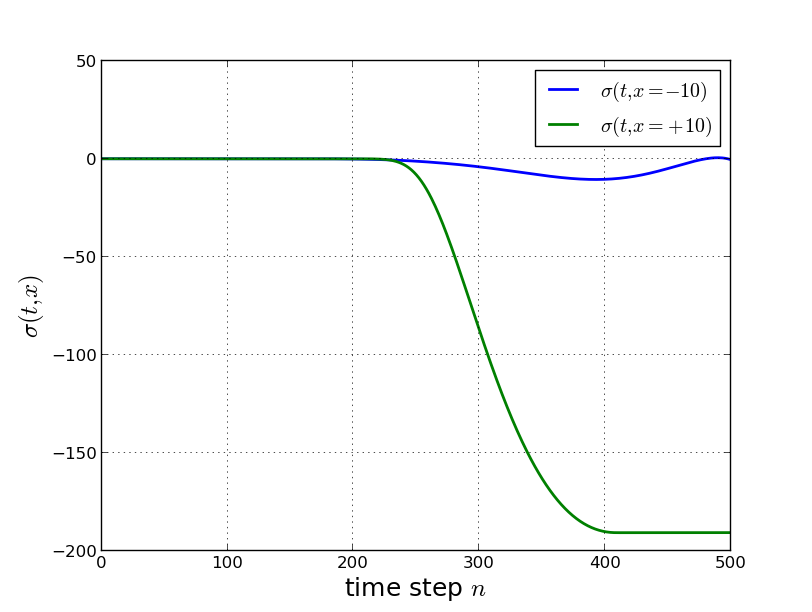

In [2]:
from IPython.display import Image
Image(filename='./fig/s18-07/sigma.png')

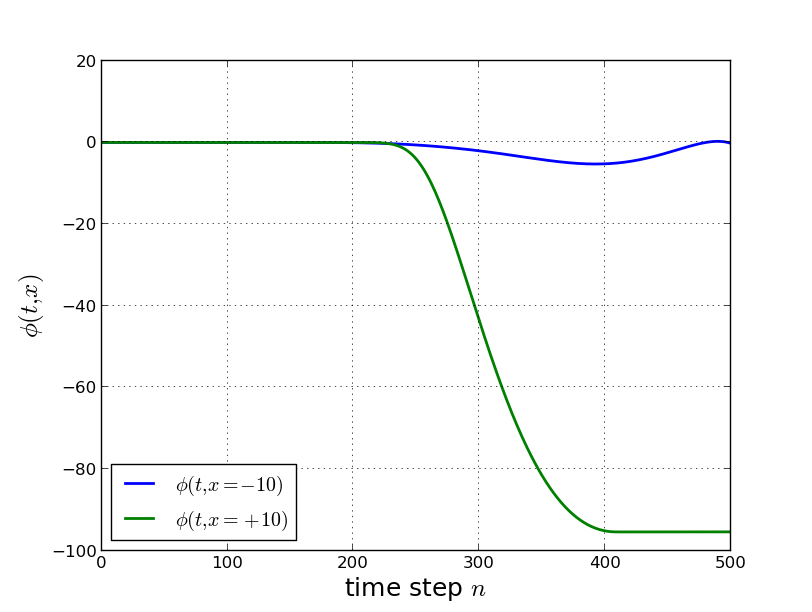

In [3]:
from IPython.display import Image
Image(filename='./fig/s18-07/phi.png')

## electrons (time zero)

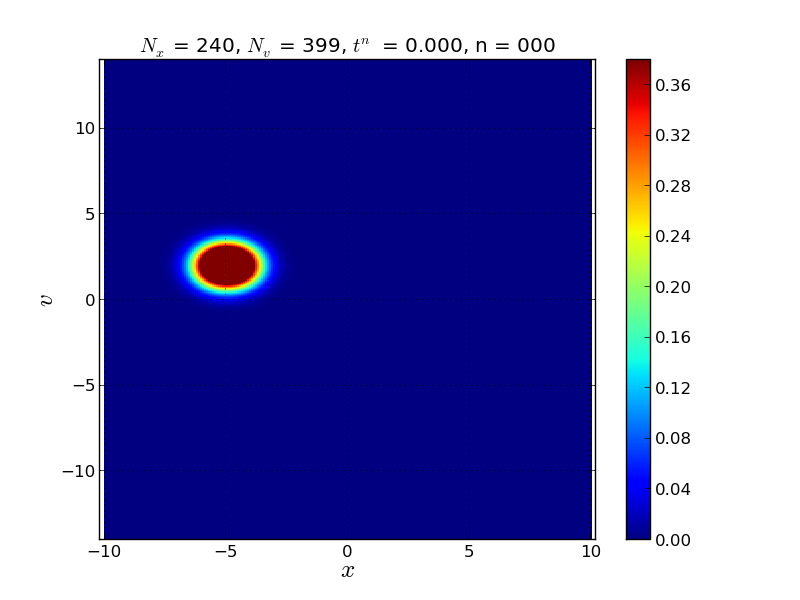

In [4]:
from IPython.display import Image
Image(filename='./fig/s18-07/plot_-_1D1V_electron_LF2_Nx240Nv400Nt500_it00000.png')

The distribution has almost all positive velocity (above the horizontal axis), the distribution will evolve along lines of constant energy where the bulk of it will head rightward (positive velocity), the portion dipping into the negative velocity will rush leftward. Since the ions are $\sim 10$ Debye lengths away (see ions at time zero below), this trend continues mostly uninhibited as the electrostatic interaction is not significantly felt by the mobile electrons.

## ions (time zero)

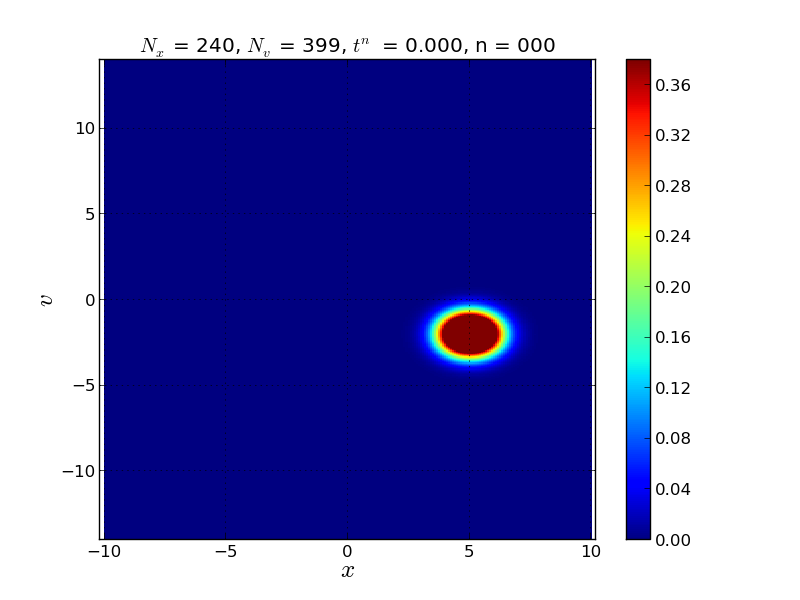

In [9]:
from IPython.display import Image
Image(filename='./fig/s18-07/plot_-_1D1V_ion_LF2_Nx240Nv400Nt500_it00000.png')

Ions have the "opposite" distribution as electrons above. Most of them are initialized with negative velocity (towards left wall), a small portion has positive velocity (towards right wall)

## electrons ($t^n = t^{237}$)

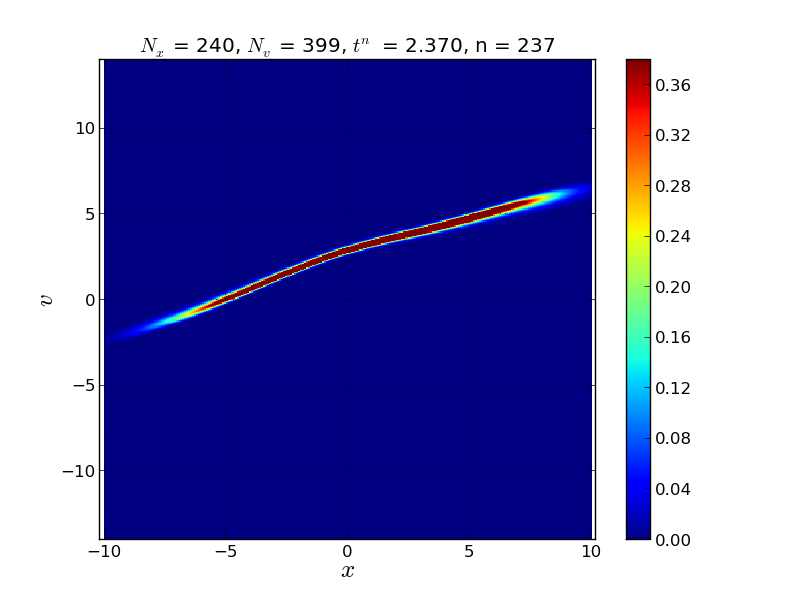

In [5]:
from IPython.display import Image
Image(filename='./fig/s18-07/plot_-_1D1V_electron_LF2_Nx240Nv400Nt500_it00237.png')

Here, electrons begin to reach the right wall, charging it negative (see charge history and potential plot). Note, we also see some minimial electron charge collection on the left wall.

## ions ($t^n = t^{237}$)

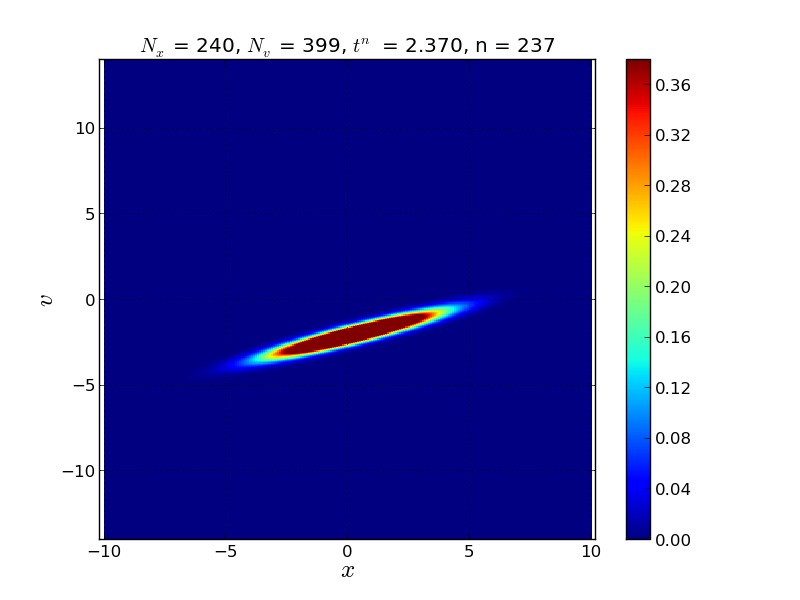

In [10]:
from IPython.display import Image
Image(filename='./fig/s18-07/plot_-_1D1V_ion_LF2_Nx240Nv400Nt500_it00237.png')

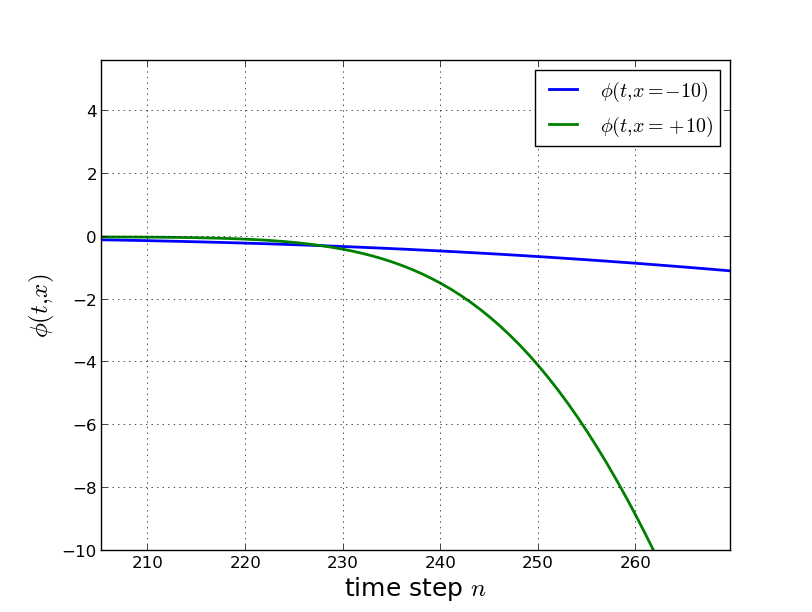

In [11]:
from IPython.display import Image
Image(filename='./fig/s18-07/phi_n237.png')

The potential dips negative for both walls since the electrons (see just above) are collecting at the right wall and the left wall, whereas the ions have not had enough time to travel sufficient distance to impede this trend.

# electrons ($t^n = t^{308}$)

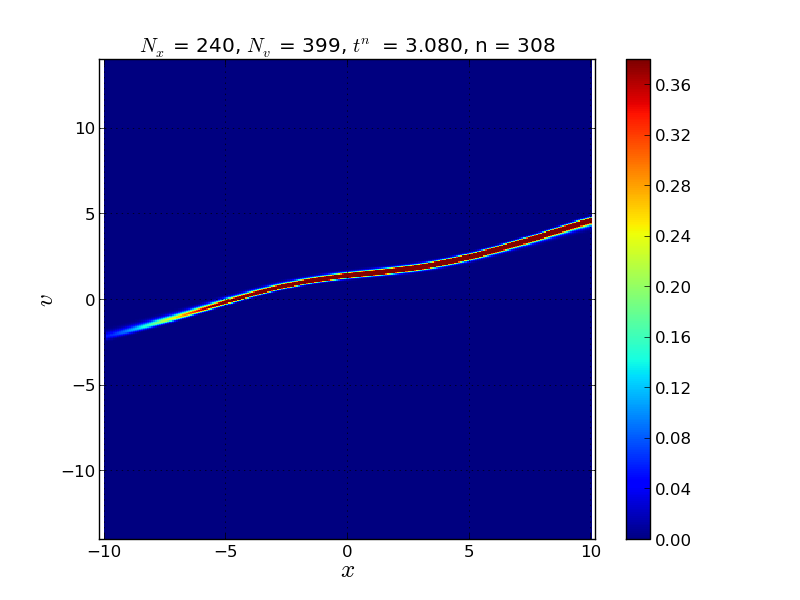

In [6]:
from IPython.display import Image
Image(filename='./fig/s18-07/plot_-_1D1V_electron_LF2_Nx240Nv400Nt500_it00308.png')

The electrons continue to be collected at the right wall. At this time frame, we have chosen the steepest part of the charge density (phi) curve, which shows a time in the middle of an approximately constant rate of charge collection ($d\sigma / dt \sim \text{const}$, see charge density plot). This continues while the energetic bar for electrons to reach the wall continues to raise as the potential gets more negative. Electrons also continue to be collected at the left wall, its charge density there is dipping negative (as well as $\phi$) as seen in the above plot.

# ions ($t^n = t^{308}$)

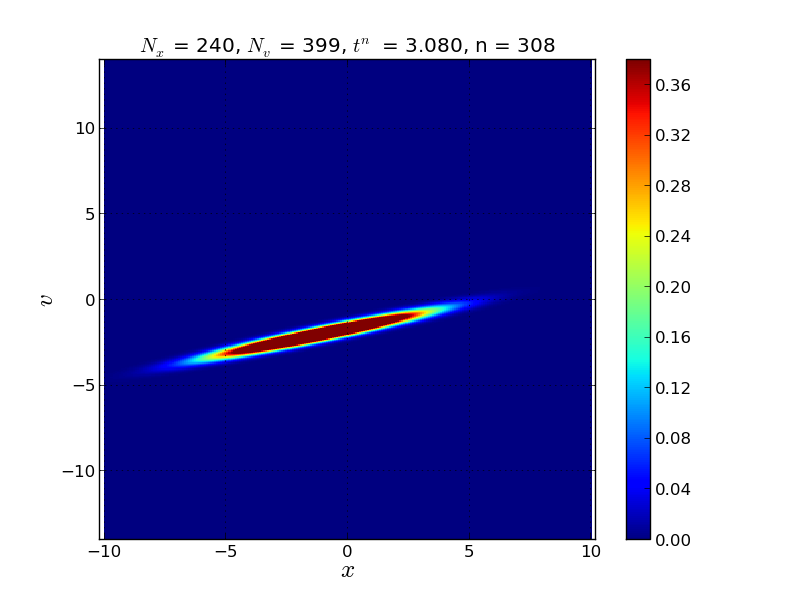

In [12]:
from IPython.display import Image
Image(filename='./fig/s18-07/plot_-_1D1V_ion_LF2_Nx240Nv400Nt500_it00308.png')

By now, a tiny fraction of positive charges are beginning to reach the left wall. None can reach the right wall at this stage.

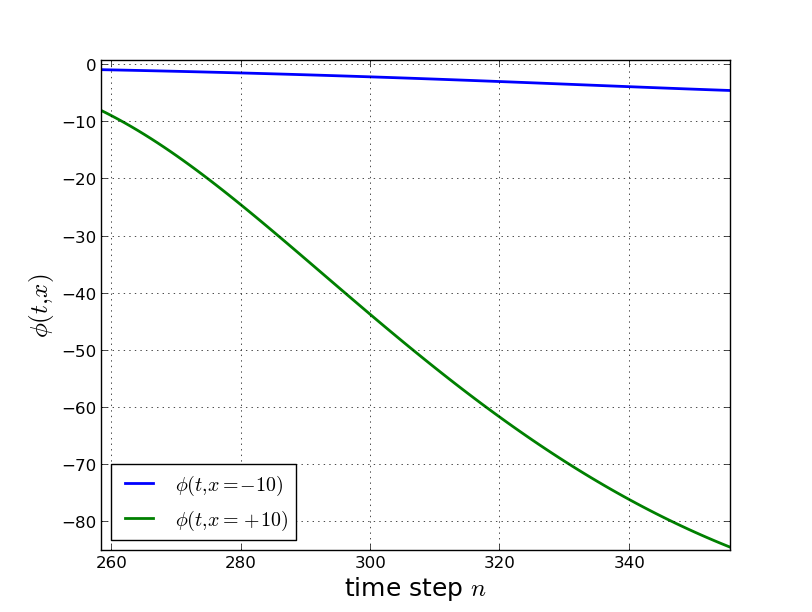

In [13]:
from IPython.display import Image
Image(filename='./fig/s18-07/phi_n308.png')

# electrons ($t^n = t^{428}$)

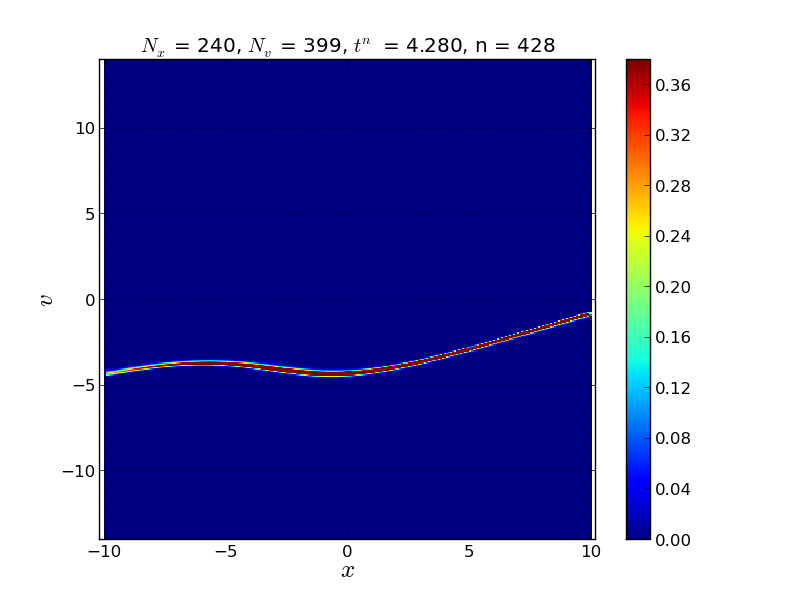

In [14]:
from IPython.display import Image
Image(filename='./fig/s18-07/plot_-_1D1V_electron_LF2_Nx240Nv400Nt500_it00428.png')

At the right wall, the wall has become as negative as it will get, this sufficiently bars all incoming electrons from reaching it and repels them to where we now see all electrons are leftward moving (negative velocity). The potential at the right wall continues to stay at this constant value for the duration of the simulation as the ions do not quite reach the wall in enough numbers by the simulation's end to cause the value to change.

At the left wall, electrons continue to be collected, though as can be seen the number is outnumbered by those of the incoming ions at the left wall. The charge history at this left wall has been electron buildup, so it has achieved this negative value; however, as can be seen from the potential plot and the ions at this time frame, the potential begins to become more positive as ion buildup continues.

# ions ($t^n = t^{428}$)

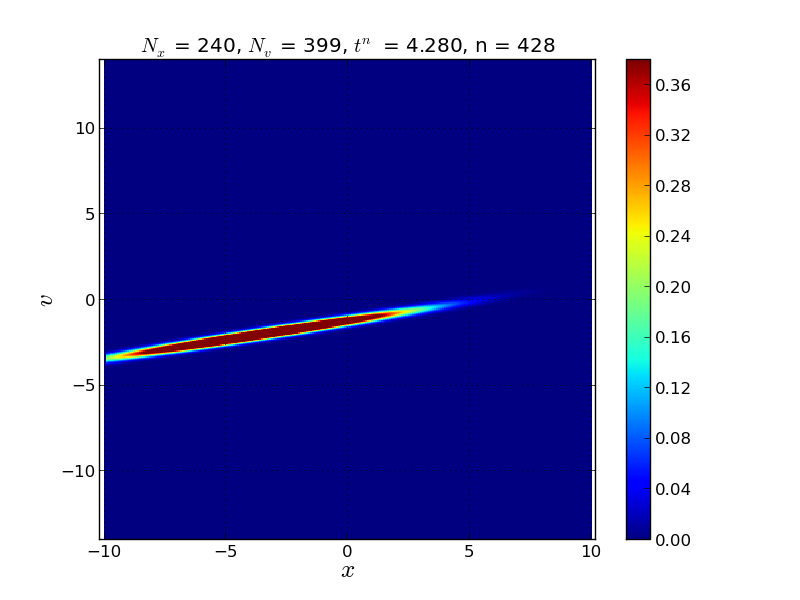

In [16]:
from IPython.display import Image
Image(filename='./fig/s18-07/plot_-_1D1V_ion_LF2_Nx240Nv400Nt500_it00428.png')

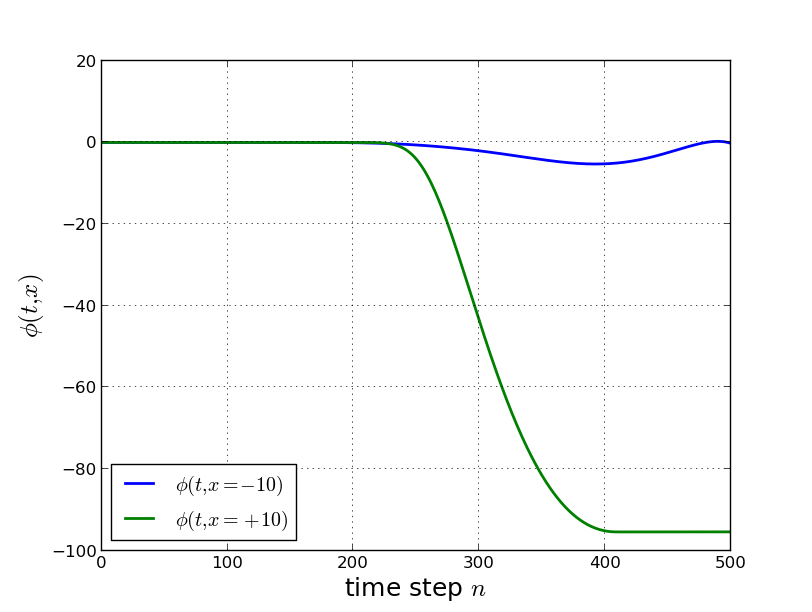

In [15]:
from IPython.display import Image
Image(filename='./fig/s18-07/phi.png')

# electrons ($t^n = t^{500}$, simulation end)

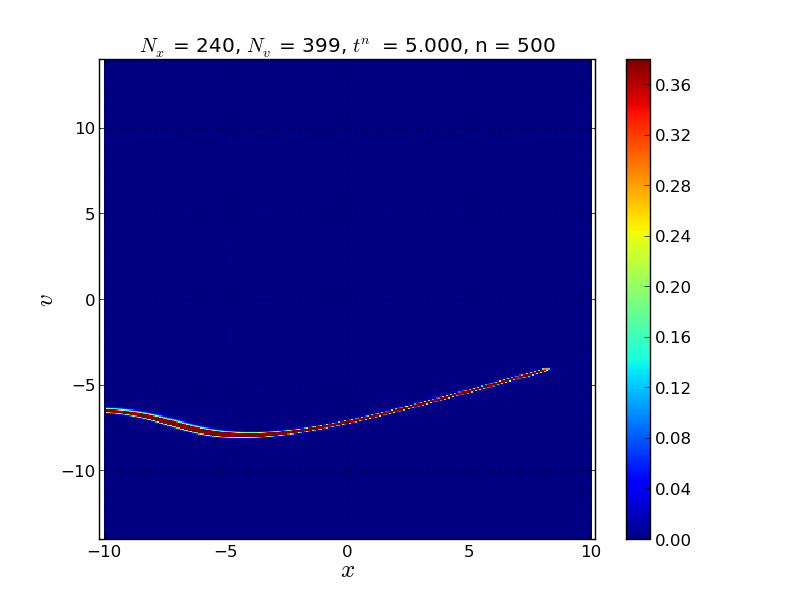

In [18]:
from IPython.display import Image
Image(filename='./fig/s18-07/plot_-_1D1V_electron_LF2_Nx240Nv400Nt500_it00500.png')

# ions ($t^n = t^{500}$, simulation end)

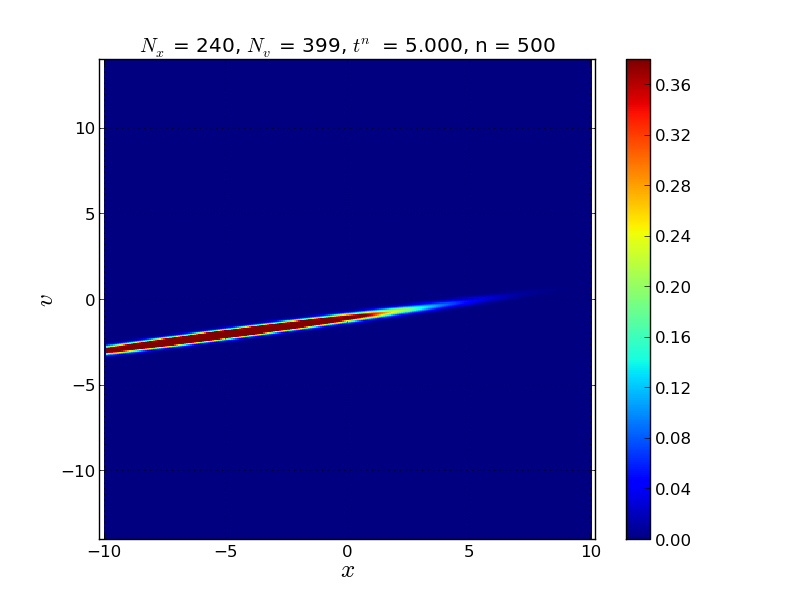

In [17]:
from IPython.display import Image
Image(filename='./fig/s18-07/plot_-_1D1V_ion_LF2_Nx240Nv400Nt500_it00500.png')

Enough ions have reached the left wall between the last time frame and this that the potential breaches $\phi = 0$ though the continued collection of electrons competes with this and dips it negative by the simulation end, but only slightly. As concerns the right wall, while some minimal number of ions do reach that wall; however, the number is such a minutia that the right wall's potential is basically unchanged.

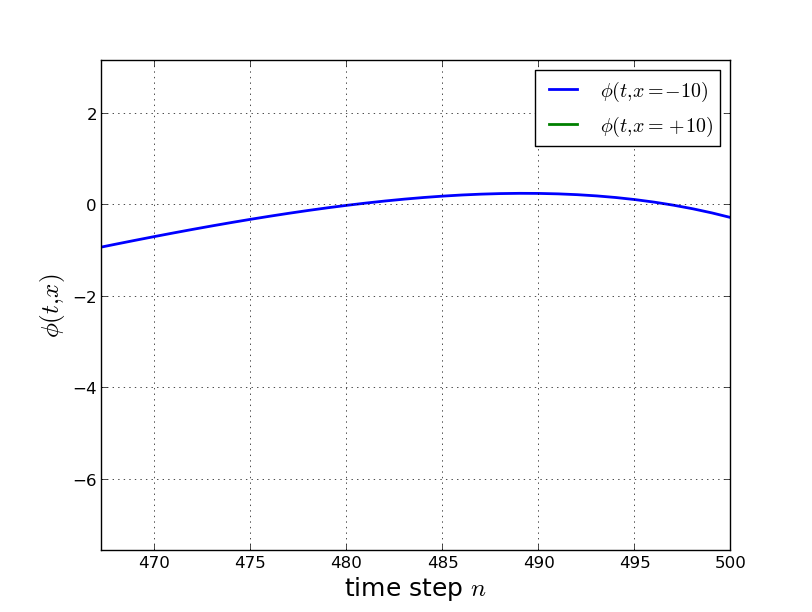

In [19]:
from IPython.display import Image
Image(filename='./fig/s18-07/phi_n500.png')

ions hit both walls causing wall accumulation. We see on the left the density goes upward slightly due to the ion concentrations accumulating on the left wall and it repelling ions.